In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
df = pd.read_csv('https://query.data.world/s/fkumtivouh5oejiblmop6dip24hlgq')

In [39]:
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


# **Removing unwanted rows**

In [40]:
df.drop(["id"],axis = 1,inplace = True)
df

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


# **Making the brand names to categorical variables --> numbers **

In [41]:
#import preprocessing from sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [42]:
df['brand'] = le.fit_transform(df.brand)
df['brand'].unique()
df

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


# **PCA**

In [45]:
df_no_brand = df
df_no_brand.drop(['brand'],axis = 1, inplace = True)

In [46]:
df_no_brand.head(10)

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,27.72,21.19,45.29,5.16,1.66,0.64,4.95


In [51]:
df_no_brand.shape

(300, 7)

In [55]:
df_no_brand.values

array([[27.82, 21.43, 44.87, ...,  1.77,  0.77,  4.93],
       [28.49, 21.26, 43.89, ...,  1.79,  1.02,  4.84],
       [28.35, 19.99, 45.78, ...,  1.63,  0.8 ,  4.95],
       ...,
       [44.55, 11.01, 16.03, ...,  0.64, 25.98,  2.92],
       [47.6 , 10.43, 15.18, ...,  0.56, 24.47,  2.76],
       [46.84,  9.91, 15.5 , ...,  0.57, 25.48,  2.81]])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_no_brand.values)
X_scaled = scaler.transform(df_no_brand.values)

In [59]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)

In [96]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [97]:
x_pca = pca.transform(X_scaled)

In [98]:
X_scaled.shape

(300, 7)

In [99]:
x_pca.shape

(300, 2)

# **PLOT**

Text(0, 0.5, 'Second')

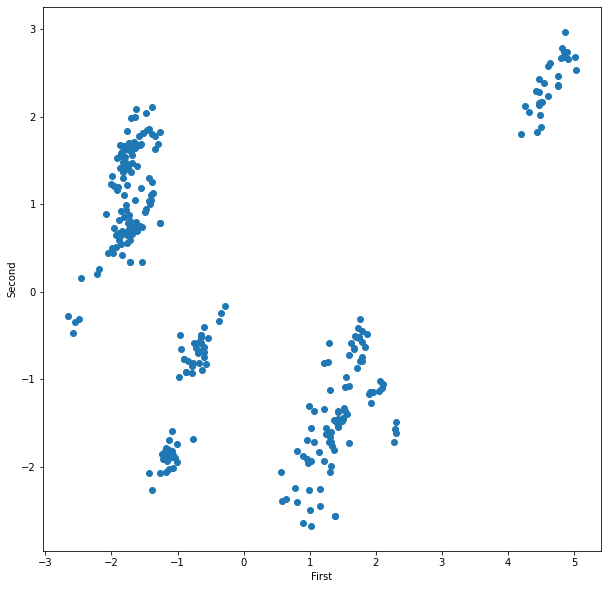

In [103]:
pyt.figure(figsize=(10,10))
pyt.scatter(x_pca[:,0],x_pca[:,1],cmap = "brand")
pyt.xlabel("First")
pyt.ylabel("Second")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0, 0.5, 'Second')

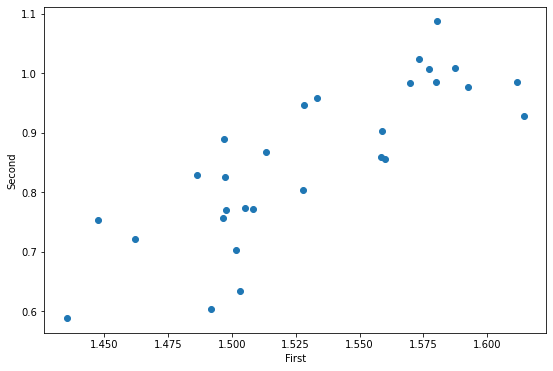

In [104]:
pyt.figure(figsize=(9,6))
pyt.scatter(np.log(x_pca[:,0]),np.log(x_pca[:,1]),cmap = "brand")
pyt.xlabel("First")
pyt.ylabel("Second")

In [105]:
from seaborn import regplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


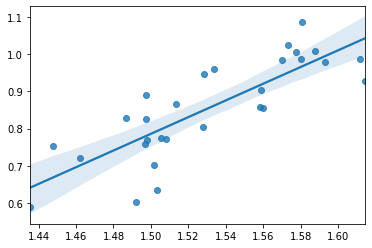

In [106]:
regplot(np.log(x_pca[:,0]),np.log(x_pca[:,1]))